### Analysis of IMDB

Загрузка модулей и исходных данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Загрузка данных
# Оригинальный набор данных доступен для скачивания по ссылке https://www.kaggle.com/karrrimba/movie-metadatacsv
movies = pd.read_csv('data/movie_metadata.csv')

### Обработка исходных данных

In [2]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null object
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5031 non-null object
plot_keywords                4889 non-null object
movie_imdb_link              5043 non-

In [4]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Unnamed: 28'],
      dtype='object')

<ul>
<li>
<span style="color:cadetblue">movie_title:</span> Contains title of a movie
</li>
<li>
<span style="color:cadetblue">color:</span> Specifies whether a movie is black and white or color
</li>
<li>
<span style="color:cadetblue">num_critic_for_reviews:</span> Contains number of critic reviews per movie
</li>
<li>
<span style="color:cadetblue">movie_facebook_likes:</span> Contains number of facebook likes per movie
</li>
<li>
<span style="color:cadetblue">duration:</span> Contains duration of a movie in minutes
</li>
<li>
<span style="color:cadetblue">director_name:</span> Contains name of the director of a movie
</li>
<li>
<span style="color:cadetblue">director_facebook_likes:</span> Contains number of facebook likes for a director
</li>
<li>
<span style="color:cadetblue">actor_3_name:</span> Contains the name of the 3rd leading actor of a movie
</li>
<li>
<span style="color:cadetblue">actor_3_facebook_likes:</span> Contains number of facebook likes for actor 3
</li>
<li>
<span style="color:cadetblue">actor_2_name:</span> Contains name of 2nd leading actor of a movie
</li>
<li>
<span style="color:cadetblue">actor_2_facebook_likes:</span> Contains number of facebook likes for actor 2
</li>
<li>
<span style="color:cadetblue">actor_1_name:</span> Contains name of the actor in lead role
</li>
<li>
<span style="color:cadetblue">actor_1_facebook_likes:</span> Contains number of facebook likes for actor 1
</li>
<li>
<span style="color:cadetblue">gross:</span> Contains the amount a movie grossed in USD
</li>
<li>
<span style="color:cadetblue">genres:</span> Contains the sub-genres to which a movie belongs
</li>
<li>
<span style="color:cadetblue">num_voted_users:</span> Contains number of users votes for a movie
</li>
<li>
<span style="color:cadetblue">cast_total_facebook_likes:</span> Contains number of facebook likes for the entire cast of a movie
</li>
<li>
<span style="color:cadetblue">facenumber_in_poster:</span> Contains number of actor’s faces on a movie poster
</li>
<li>
<span style="color:cadetblue">plot_keywords:</span> Contains key plot words associated with a movie
</li>
<li>
<span style="color:cadetblue">movie_imdb_link:</span> Contains the link to the imdb movie page
</li>
<li>
<span style="color:cadetblue">num_user_for_reviews:</span> Contains the number of user generated reviews per movie
</li>
<li>
<span style="color:cadetblue">language:</span> Contains the language of a movie
</li>
<li>
<span style="color:cadetblue">country:</span> Contains the name of the country in which a movie was made
</li>
<li>
<span style="color:cadetblue">content_rating:</span> Contains maturity rating of a movie
</li>
<li>
<span style="color:cadetblue">budget:</span> Contains the amount of money spent in production per movie (not always in USD)
</li>
<li>
<span style="color:cadetblue">title_year:</span> Contains the year in which a film was released
</li>
<li>
<span style="color:cadetblue">imdb_score:</span> Contains user generated rating per movie
</li>
<li>
<span style="color:cadetblue">aspect_ratio:</span> Contains the size of the aspect ratio of a movie
</li>
</ul>

In [5]:
# Размерность исходных данных (до чистки)
movies.shape

(5043, 29)

In [6]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5043.000000,4.550000e+03,4935.000000,5030.00000,5043.000000,4714.000000,5043.000000,1.0
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,9698.869919,3.976131e+07,2042.589666,1652.13499,6.460500,2.218154,7525.883601,424.0
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,18163.896056,2.061367e+08,2818.515648,4042.38266,1.711121,1.371273,19320.475709,NaN
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,0.000000,2.180000e+02,1916.000000,0.00000,1.600000,1.180000,0.000000,424.0
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,1411.000000,6.000000e+06,1999.000000,281.00000,5.800000,1.850000,0.000000,424.0
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3090.000000,2.000000e+07,2005.000000,595.00000,6.600000,2.350000,165.000000,424.0
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,13756.500000,4.500000e+07,2011.000000,918.75000,7.200000,2.350000,3000.000000,424.0
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,656730.000000,1.221550e+10,200000.000000,137000.00000,98.000000,16.000000,349000.000000,424.0


Из таблицы movies.describe() видно, что некоторые данные являются некорректными. Такие данные нужно почистить.

In [7]:
# Рейтинг фильма imdb_score не может быть больше 10 баллов
movies.loc[movies['imdb_score'] > 10, 'imdb_score'] = movies['imdb_score'].mean()
# Год выпуска фильма не может быть больше текущего
movies.loc[movies['title_year'] > 2019, 'title_year'] = 2019 #movies['title_year'].mean()

# Заполняем пустые значения
movies['duration'] = movies['duration'].fillna(movies['duration'].mean())
movies['title_year'] = movies['title_year'].fillna(movies['title_year'].mean())

# Удаляем ненужное поле "Unnamed: 28"
movies.drop(['Unnamed: 28'], axis='columns', inplace=True)

# Удаляем дубликаты записей
movies.drop_duplicates(keep = False, inplace = True)

In [8]:
# Размерность данных (после чистки)
movies.shape

(4953, 28)

In [9]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4905.000000,4953.000000,4851.00000,4930.000000,4946.000000,4.089000e+03,4953.000000,4.470000e+03,4953.000000,4940.000000,4953.000000,4628.000000,4953.000000
mean,139.580428,107.225725,690.88827,634.698783,6553.776183,4.818045e+07,9654.219059,3.975188e+07,2002.468610,1634.471053,6.440170,2.220160,7448.113265
std,121.350357,25.262584,2830.09476,1620.841572,15103.043295,6.746437e+07,18167.109572,2.078570e+08,12.343127,4019.092593,1.122981,1.383372,19260.372478
min,1.000000,7.000000,0.00000,0.000000,0.000000,1.620000e+02,0.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.00000,132.000000,611.000000,5.217498e+06,1400.000000,6.000000e+06,1999.000000,278.750000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,48.00000,367.500000,983.000000,2.533594e+07,3072.000000,2.000000e+07,2005.000000,593.000000,6.600000,2.350000,161.000000
75%,194.000000,118.000000,192.00000,634.750000,11000.000000,6.232104e+07,13716.000000,4.500000e+07,2010.000000,912.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.00000,23000.000000,640000.000000,7.605058e+08,656730.000000,1.221550e+10,2019.000000,137000.000000,9.500000,16.000000,349000.000000


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 5042
Data columns (total 28 columns):
color                        4934 non-null object
director_name                4851 non-null object
num_critic_for_reviews       4905 non-null float64
duration                     4953 non-null float64
director_facebook_likes      4851 non-null float64
actor_3_facebook_likes       4930 non-null float64
actor_2_name                 4940 non-null object
actor_1_facebook_likes       4946 non-null float64
gross                        4089 non-null float64
genres                       4953 non-null object
actor_1_name                 4946 non-null object
movie_title                  4953 non-null object
num_voted_users              4953 non-null object
cast_total_facebook_likes    4953 non-null int64
actor_3_name                 4930 non-null object
facenumber_in_poster         4941 non-null object
plot_keywords                4801 non-null object
movie_imdb_link              4953 non-

### Анализ данных

Определение основных статистических величин рейтинга

In [11]:
# Cреднее арифметическое рейтинга
arithmetic_mean = movies.imdb_score.sum() / movies.imdb_score.count()
print(f'Cреднее арифметическое рейтинга: {arithmetic_mean}')

# Среднеквадратичное отклонение
root_mean_square_deviation = np.sqrt(((movies.imdb_score - arithmetic_mean)**2).sum() / movies.imdb_score.count())
print(f'Среднеквадратичное отклонение: {root_mean_square_deviation}')

# Смещенная оценка дисперсии
displaced_dispersion_assessment = ((movies.imdb_score - arithmetic_mean)**2).sum() / movies.imdb_score.count()
print(f'Смещенная оценка дисперсии: {displaced_dispersion_assessment}')

# Несмещенная оценка дисперсии
not_displaced_dispersion_assessment = ((movies.imdb_score - arithmetic_mean)**2).sum() / (movies.imdb_score.count() - 1)
print(f'Несмещенная оценка дисперсии: {not_displaced_dispersion_assessment}')

Cреднее арифметическое рейтинга: 6.440169695074209
Среднеквадратичное отклонение: 1.1228678094173108
Смещенная оценка дисперсии: 1.26083211742563
Несмещенная оценка дисперсии: 1.2610867281117013


Построения гистограмм рейтингов фильмов

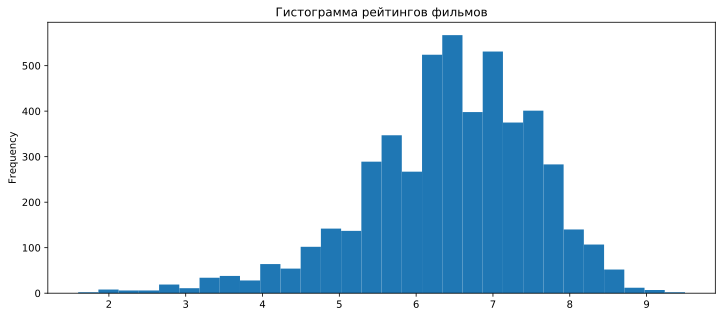

In [12]:
rcParams['figure.figsize'] = 12, 5
movies['imdb_score'].plot(kind='hist', bins=30, title='Гистограмма рейтингов фильмов')

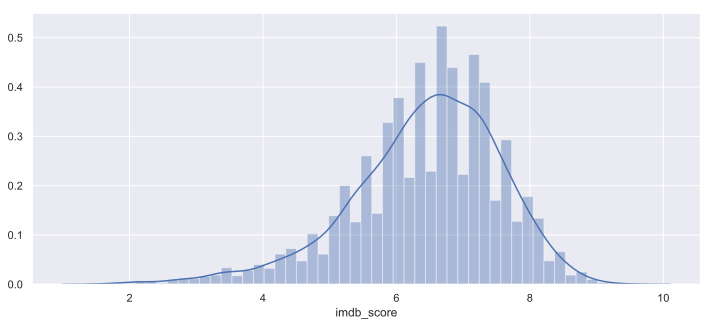

In [13]:
sns.set(rc={"figure.figsize": (12, 5)});
sns.distplot(movies['imdb_score'])

### Корреляционный анализ

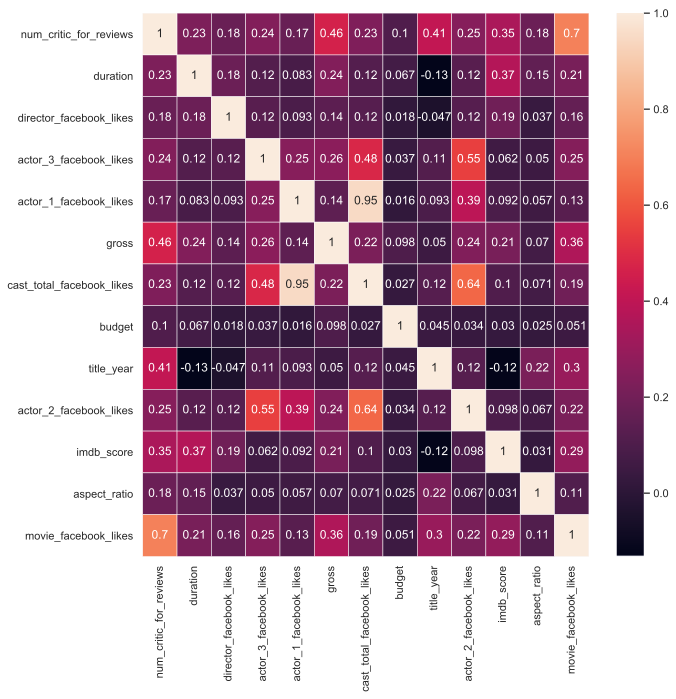

In [14]:
columns = movies.columns
discrete = []
continuous = []
for i in columns:
    if movies[i].dtype =='object':
        discrete.append(i)
    else:
        continuous.append(i)

movies_corr = movies[continuous].dropna().corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(movies_corr,
            xticklabels=movies_corr.columns.values,
            yticklabels=movies_corr.columns.values,
           annot=True, linewidths=.5, ax=ax)

Из таблицы корреляции наглядно видно степень зависимости показателей друг от друга.

### Дисперсионный анализ

Проведем дисперсионный анализ для определения различия в рейтингах между фильмами разных стран производителей

In [15]:
# Посмотрим сколько фильмов по каждой стране в наборе данных
countries = movies['country'].value_counts()
countries

USA                     3738
UK                       438
France                   154
Canada                   122
Germany                   95
Australia                 55
India                     34
Spain                     33
China                     26
Italy                     23
Japan                     21
Hong Kong                 17
Mexico                    17
New Zealand               15
South Korea               14
Ireland                   12
Denmark                   11
Russia                    11
Brazil                     8
Norway                     8
South Africa               8
Sweden                     6
Thailand                   5
Netherlands                5
Poland                     5
Iran                       4
Romania                    4
Argentina                  4
Israel                     4
Belgium                    4
                        ... 
Greece                     2
Aruba                      1
Slovenia                   1
Official site 

Проведем однофакторный дисперсионный анализ между странами Великобританией, Францией и Канадой

In [16]:
# Количество стран для проведения анализа
k = 3

# Выбираем значения рейтингов по нужным странам
uk_score = np.array(movies.loc[movies['country']=='UK']['imdb_score'], dtype=np.float64)
fr_score = np.array(movies.loc[movies['country']=='France']['imdb_score'], dtype=np.float64)
ca_score = np.array(movies.loc[movies['country']=='Canada']['imdb_score'], dtype=np.float64)

# Количество фильмов по странам
n_uk = len(uk_score)
n_fr = len(fr_score)
n_ca = len(ca_score)
N = n_uk + n_fr + n_ca
print(f'Количество фильмов по странам: Общее - {N}; Великобритания - {n_uk}; Франция - {n_fr}; Канада - {n_ca}')

# Средний рейтинг по каждой стране
uk_mean = np.mean(uk_score)
fr_mean = np.mean(fr_score)
ca_mean = np.mean(ca_score)
print(f'Средний рейтинг фильмов по странам: Великобритания - {uk_mean}; Франция - {fr_mean}; Канада - {ca_mean}')

Количество фильмов по странам: Общее - 714; Великобритания - 438; Франция - 154; Канада - 122
Средний рейтинг фильмов по странам: Великобритания - 6.80593607305936; Франция - 6.678571428571429; Канада - 6.145901639344262


Видно, что средние рейтинги разнятся. Установим, что это отличие статистически значимо. 

In [17]:
# Соберем все значения рейтингов в один массив:
all_score = np.concatenate([uk_score, fr_score, ca_score], axis=0)

# Среднее значения рейтинга
all_mean = np.mean(all_score)
print(f'Среднее значения рейтинга: {all_mean}')

# Cумма квадратов отклонений наблюдений от общего среднего
s2 = np.sum((all_score - all_mean)**2)
print(f'Cумма квадратов отклонений наблюдений от общего среднего: {s2}')

# Cумма квадратов отклонений средних групповых значений от общего среднего
s2_f = ((uk_mean - all_mean)**2) * n_uk + ((fr_mean - all_mean)**2) * n_fr + ((ca_mean - all_mean)**2) * n_ca
print(f'Cумма квадратов отклонений средних групповых значений от общего среднего: {s2_f}')

# Остаточная сумма квадратов отклонений
s2_residual = np.sum((uk_score - uk_mean)**2) + np.sum((fr_score - fr_mean)**2) + np.sum((ca_score - ca_mean)**2)
print(f'Остаточная сумма квадратов отклонений: {s2_residual}')

# Проверка соблюдения равенства s2_f + s2_residual = s2
print(f'Проверка соблюдения равенства: {s2_f + s2_residual}')

# Общая дисперсия
sigma2_general = s2 / (N - 1)
print(f'Общая дисперсия: {sigma2_general}')

# Факторная дисперсия
sigma2_f = s2_f / (k - 1)
print(f'Факторная дисперсия: {sigma2_f}')

# Остаточная дисперсия
sigma2_residual = s2_residual / (N - k)
print(f'Остаточная дисперсия: {sigma2_residual}')

# 𝐹_h
F_h = sigma2_f / sigma2_residual
print(f'F_h: {F_h}')

# Значение 𝐹крит в таблице критических точек распределения Фишера-Снедекора для заданного уровня значимости 𝛼=0.05 (значения 2 и 711) 
F_kr = 19.4957
print(f'F_kr: {F_kr}')

Среднее значения рейтинга: 6.665686274509804
Cумма квадратов отклонений наблюдений от общего среднего: 793.2493137254902
Cумма квадратов отклонений средних групповых значений от общего среднего: 41.602510981486645
Остаточная сумма квадратов отклонений: 751.6468027440035
Проверка соблюдения равенства: 793.2493137254901
Общая дисперсия: 1.1125516321535627
Факторная дисперсия: 20.801255490743323
Остаточная дисперсия: 1.0571684989367138
F_h: 19.676386036535284
F_kr: 19.4957


Так как F_h > F_kr, то различие средних рейтингов в трех странах статистически значимо

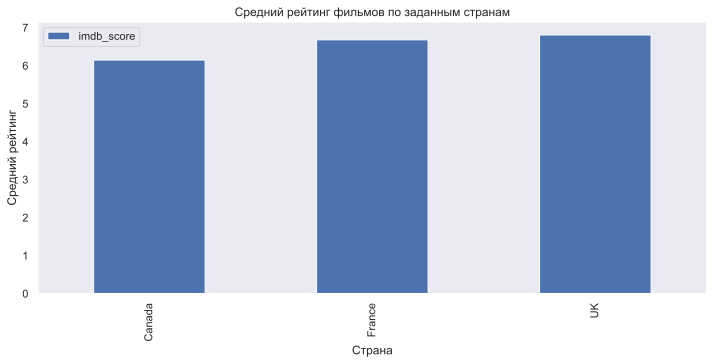

In [18]:
# Визуализация данных
movies.loc[movies['country'].isin(['UK', 'France', 'Canada'])][['country','imdb_score']].groupby('country').mean().plot(kind='bar', title='Средний рейтинг фильмов по заданным странам')
plt.xlabel('Страна')
plt.ylabel('Средний рейтинг')
plt.grid()